# Machine Learning Regression und Klassifikation Vertiefung

## TEIL A: Regression mit Hauspreisberechnung

<div style="padding: 5px; border: 5px solid #a10000ff;">

**Hinweis:** In den Codezellen sind jeweils einige Codeteile nicht programmiert. Diesen Code müssen Sie ergänzen. Die jeweiligen Stellen sind mit einem Kommentar und dem Keyword **TODO** vermerkt und z.T. Stellen mit ... markiert.

Ausserdem gibt es einige assert Statements. Diese geben einen Fehler aus, sollte etwas bei Ihrer Programmierung nicht korrekt sein.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np

In diesem Dataset wurden verschiedene Eigenschaften von Liegenschaften erfasst. 

Dabei soll nun von den Eigenschaften / Merkmalen auf den Hauspreis geschlossen werden. Der **Hauspreis** ist somit die **Zielvariable** oder engl. *Target*, ähnlich dem Label in der Klassifikation.

Die Berechnungen des Hauspreises, werden wir mit einem Regressionsmodell machen.

Das Dataset das wir benutzten, ist das California Housing Dataset:
https://media.geeksforgeeks.org/wp-content/uploads/20240522145850/housing%5B1%5D.csv

In [22]:
# Wir laden den Datensatz in ein Pandas DataFrame und zeigen die ersten Zeilen an
df_housing = pd.read_csv("../data/housing.csv")
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Aufgabe 1

Sie haben sich sicherlich die Features im Dataframe angeschaut. Machine Learning Modelle benötigen die Daten als Zahlen um diese im Features Space abbilden zu können. Jedoch haben wir mit ocean_proximity ein Feature das Kategorische Daten enthält.

**Frage:** Um welche Art von Skalentyp handelt es sich? Wie übertragen wir ein solches Feature in einen Feature Space?

<br>
<details>
<summary><b>Lösung: Klicke hier für die Lösung.</b></summary>

Es handelt sich um eine Nominalskala. Die Ordnung ist nicht klar gegeben. Es ist z.B. nicht klar ob Island näher am Ozean ist wie Near Ocean zum Beispiel.

Diese können wir mit dem sogenannten One-Hot-Encoding in einen mathematischen Raum übertragen. Dies geschieht indem wir für jede Kategorie eine neue Dimension anlegen und dort eine 1 vermerken wenn die Kategorie zutrifft und bei allen anderen eine 0. Wir nutzen dazu den One-Hot-Encoder von Scikit-learn.

Zusätzlich entfernen wir noch alle Data Samples die leere Werte haben.

</details>


In [23]:
# Wir verwenden OneHotEncoder aus sklearn.preprocessing
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# TODO Konfiguriere das One-Hot-Encoding auf der Spalte 'ocean_proximity' indem du das DataFrame df_housing mit der Spaltenangabe als Parameter einfügst. Beispiel: ohe.fit(df_iris[['petal length (cm)']])
ohe.fit(df_housing[['ocean_proximity']])

# Wir erstellen ein neues DataFrame mit den kodierten Spalten und fügen sie dem ursprünglichen DataFrame hinzu. Danach entfernen wir die ursprüngliche Spalte 'ocean_proximity'.
df_housing_encoded = pd.concat([df_housing, pd.DataFrame(ohe.transform(df_housing[['ocean_proximity']]), columns=ohe.get_feature_names_out(['ocean_proximity']))], axis=1)
df_housing_encoded.drop('ocean_proximity', axis=1, inplace=True)

# Wir entfernen Zeilen mit fehlenden Werten, da diese nicht für das Training des Modells verwendet werden können
df_housing_encoded.dropna(inplace=True)

df_housing_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


### Aufgabe 1.1: Verleiche nun die Ausgabe hier mit dem initialen DataFrame weiter oben. Wie viele Spalten sind nun dazugekommen und welche wurde entfernt?
> OceanProximity entfernt, fünf neue Features dazugekommen

### Skalierung

Wir möchten nun noch die Daten normalisieren. Dies hilft einigen Modellen zum Beispiel künstlichen Neuronalen Netzwerken schneller zu optimieren und zu lernen.
Wir wenden die min-max-Skalierung an. Das heisst alle Features haben danach einen minimalen Wert von 0 und einen maximalen Wert von 1.

**Führen Sie die nächste Zelle aus:**

$scaled\_value = \frac{value-min}{max - min}$

In [24]:
 # Normalize numerical features with min max scaling

# Identify numerical features
numerical_features = df_housing_encoded.select_dtypes(include=['float64', 'int64']).columns

# Apply min-max scaling
for feature in numerical_features:
    min_value = df_housing_encoded[feature].min()
    max_value = df_housing_encoded[feature].max()
    df_housing_encoded[feature] = (df_housing_encoded[feature] - min_value) / (max_value - min_value)

df_housing_encoded

# prüfen ob die numerischen Features korrekt normalisiert wurden
assert (df_housing_encoded[numerical_features].min().min() >= 0) and (df_housing_encoded[numerical_features].max().max() <= 1), "Die numerischen Features wurden nicht korrekt normalisiert."

### Aufgabe 2

Wir unterteilen das Dataset in ein Trainings und Testteil.
Dabei nehmen wir 80% Trainingsdaten und 20% Testdaten.

Lassen Sie die nächste Zelle laufen und geben Sie darunter aus, wie viele Trainings- und Testdaten Sie haben. **Tipp:** Nutzen Sie .shape oder .len()

In [25]:
# Zusatzinfos: Wir Unterteile das Dataset in Trainigns- und Testdaten. Die Spalte 'median_house_value' ist die Zielvariable, die wir vorhersagen möchten. 
# Deshalb wird sie von den Features getrennt. Wir entfernen die Zielvariable aus den Features bei der Parameterübergabe mit df_housing_encoded.drop('median_house_value', axis=1) und benutze sie als zweiten Parameter in der train_test_split Funktion.

X_housing_train, X_housing_test, y_housing_train, y_housing_test = train_test_split(df_housing_encoded.drop('median_house_value', axis=1), df_housing_encoded['median_house_value'], test_size=0.2, random_state=42)


Die **Features** sind nun in dem Variablen mit X beginnend gespeichert. Die **Targets** in den Variablen mit y beginnend.

In [26]:
#TODO Zeigen Sie an wie viele Trainings- und Testdaten Sie haben
print(f"Anzahl Testdaten: {len(X_housing_test)}")
print(f"Anzahl Trainingsdaten: {len(X_housing_train)}")

Anzahl Testdaten: 4087
Anzahl Trainingsdaten: 16346


In [27]:
# Tests zur Überprüfung der Aufteilung der Daten in Trainings- und Testdaten
assert X_housing_train.shape[0] == 16346, f"Erwartete Anzahl Trainingsdaten: 16346, aktuell sind es: {X_housing_train.shape[0]}"
assert X_housing_test.shape[0] == 4087 , f"Erwartete Anzahl Testdaten: 4087, aktuell sind es: {X_housing_test.shape[0]}"

# Prüfe ob median_house_value aus den Features entfernt wurde
assert 'median_house_value' not in X_housing_train.columns, "median_house_value wurde nicht aus den Features entfernt."

### Aufgabe 3

1. Wir nutzen die MLPRegressor Klasse um ein Modell zu instantieren. Die Klasse wurde bereits am Anfang importiert.
2. Trainieren Sie nun das Modell mit dem Aufruf der fit(Trainingsdaten, Targets) Methode.

Optional: Weitere Infos zur MLPRegressor Klasse: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

In [28]:
# Wir erstellen nun ein Regressionsmodell bestehend aus mehreren Perzeptronen (MLPRegressor)
mlp_regressor = MLPRegressor(hidden_layer_sizes=(10,), max_iter=500, random_state=42)

# TODO Trainieren Sie das Modell mit den Trainignsdaten als erstes Argument und den zugehörigen Targets als zweites Argument. Tipp: benutzen Sie die X_housing_train und y_housing_train Variablen.
mlp_regressor.fit(X_housing_train, y_housing_train)

MLPRegressor(hidden_layer_sizes=(10,), max_iter=500, random_state=42)

### Aufgabe 4

Evaluieren Sie nun ihr Modell mit den Testdaten. Dieses Mal können wir aber nicht die Accuracy nutzen, da diese nur für Klassifikationen geeignet ist.
Wir nutzen stattdessen den Root-Mean-Squared-Error. Dieser wird wie folgt berechnet:

- $y$: Echtes Label
- $\hat{y}$: Voraussage des Modells

$\text{RMSE} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2}$

In Prosa geschieht hier folgendes:
Für jedes Data Samples im Testdatenset wird das echte Label minus der Voraussage gerechnet. Dieses Ergebnis wird quadriert. Danach wird die Summe über alle diese quadrierten "Fehler" berechnet und geteilt durch die Anzahl Samples gerechnet. Somit der Mittelwert des quadrierten Fehlers. Zuletzt ziehen wir noch die Wurzel damit das Ergebnis besser interpretierbar wird, bezüglich der Grössenordnung.

Vervollständigen Sie den Code um den MSE zu berechnen.

In [29]:
# Wir berechnen nun mit dem Modell die Vorhersagen für die Testdaten als einzigen Parameter in der predict-Methode
y_housing_pred = mlp_regressor.predict(X_housing_test)

#TODO  Wir berechnen den Root Mean Squared Error (RMSE) auf dem Testset
mse_test = np.sqrt(np.sum((y_housing_test - y_housing_pred)**2) / len(y_housing_test))


In [30]:
# Beispiel Vorhersage des Preises für ein einzelnes Haus aus dem Testset

y_housing_pred_single = mlp_regressor.predict(X_housing_test[:1])
print(f'Der berechnete Hauswert beträgt: {y_housing_pred_single[0]:.2f}')


y_pred_scaled = y_housing_pred_single * (df_housing['median_house_value'].max() - df_housing['median_house_value'].min()) + df_housing['median_house_value'].min()
print(f'Der berechnete Hauswert im Originalmaßstab beträgt: {y_pred_scaled[0]:.2f}')

Der berechnete Hauswert beträgt: 0.33
Der berechnete Hauswert im Originalmaßstab beträgt: 175630.85


### Aufgabe 5

Wir zeigen nun in einem Scatter Plot noch einige zufällige Datenpunkte an, wobei wir vergleichen möchten was der echte Hauspreis ist und was unser Modell berechnet hat.
Lassen Sie die nächste Code Zelle laufen und beantworten Sie die folgende Frage.

**Frage**
Woran erkennt man einen kleinen Fehler des Modells und wie einen grossen?


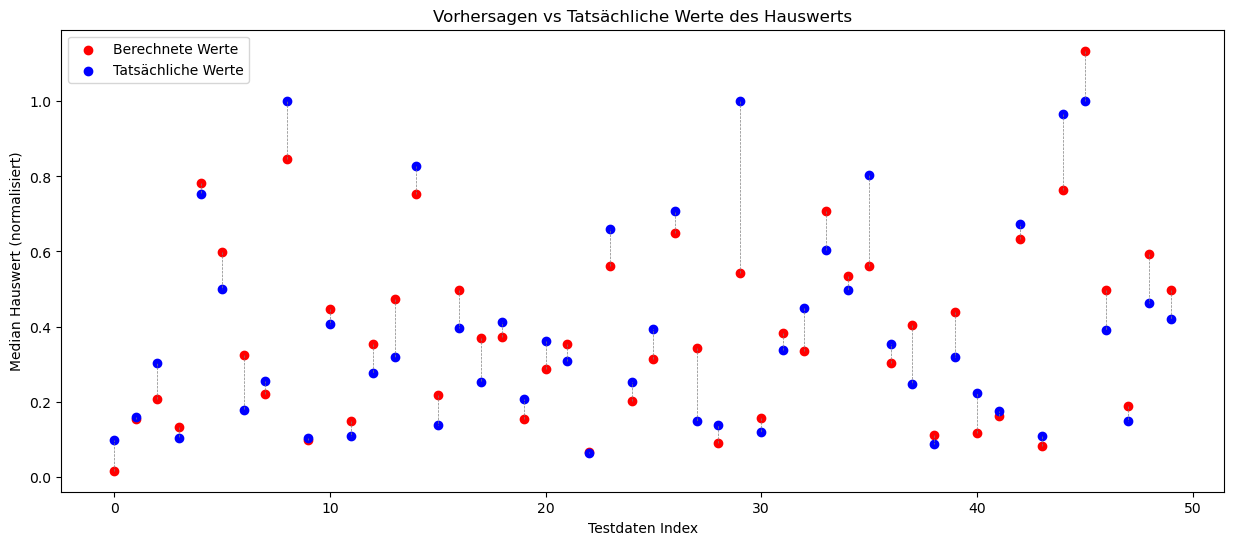

In [31]:
# Plotte die Vorhersagen des Modells gegen die tatsächlichen Werte nutze aber nur 50 zufällige Datenpunkte und zeichne den Fehler als Linie ein

random_indices = np.random.choice(len(y_housing_test), size=50, replace=False)
y_housing_pred_sampled = y_housing_pred[random_indices]
y_housing_test_sampled = y_housing_test.iloc[random_indices]


plt.figure(figsize=(15, 6))
plt.scatter(range(len(y_housing_pred_sampled)), y_housing_pred_sampled, color='red', label='Berechnete Werte')
plt.scatter(range(len(y_housing_test_sampled)), y_housing_test_sampled, color='blue', label='Tatsächliche Werte')
for i in range(len(y_housing_pred_sampled)):
    plt.plot([i, i], [y_housing_pred_sampled[i], y_housing_test_sampled.iloc[i]], color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Testdaten Index')
plt.ylabel('Median Hauswert (normalisiert)')
plt.title('Vorhersagen vs Tatsächliche Werte des Hauswerts')
plt.legend()
plt.show()

## Kontrollfragen: Regression



**Kontrollfrage 3**

Was ist der Output einer Regression und wie verhält sich dieser im Vergleich zu der Klassifikation?


**Kontrollfrage 4**

Wie können jategorische Daten auch für ein Regressionsmodell nutzbar gemacht werden?
